In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [10]:
from google.colab import files
data = files.upload()

Saving regression_iljogja.csv to regression_iljogja.csv


In [11]:
data = pd.read_csv('regression_iljogja.csv', thousands=',')

In [12]:
data.head()  # Display the first 5 rows
data.info()  # Display column types and null values
data.describe()  # Summary statistics

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   t                    30 non-null     int64
 1   Salary Expense       30 non-null     int64
 2   Marketing Expense    30 non-null     int64
 3   Operational Expense  30 non-null     int64
 4   Revenue              30 non-null     int64
dtypes: int64(5)
memory usage: 1.3 KB


,t,Salary Expense,Marketing Expense,Operational Expense,Revenue
count,30.000000,3.000000e+01,3.000000e+01,3.000000e+01,3.000000e+01
mean,15.500000,4.185781e+07,1.084531e+07,2.105322e+07,6.609130e+08
std,8.803408,1.017479e+07,4.876834e+06,6.766066e+06,1.788051e+08
min,1.000000,2.466607e+07,3.867000e+06,1.018669e+07,3.269300e+08
25%,8.250000,3.423866e+07,8.436219e+06,1.549588e+07,5.191658e+08
50%,15.500000,4.318288e+07,1.040345e+07,2.116149e+07,6.738768e+08
75%,22.750000,4.843787e+07,1.157618e+07,2.557837e+07,7.247060e+08
max,30.000000,6.348850e+07,2.461489e+07,3.687107e+07,1.214975e+09


In [17]:
# 2. Detect Outliers Using IQR Method
def detect_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (data[column] < lower_bound) | (data[column] > upper_bound)

In [21]:
# List of target columns
columns = ['Salary Expense', 'Marketing Expense', 'Operational Expense', 'Revenue']

# Create a DataFrame to store outlier flags for each column
outliers = pd.DataFrame()

# Remove and replace outliers with the column's mean
for column in columns:
    # Detect outliers
    outliers = detect_outliers(data, column)
    # Replace outliers with the mean value
    mean_value = data[column].mean()
    data.loc[outliers, column] = mean_value

# Display the dataset after replacing outliers
data.describe()

<ipython-input-21-cdb9e790908a>:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '41857805.166666664' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[outliers, column] = mean_value
<ipython-input-21-cdb9e790908a>:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '10845311.333333334' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[outliers, column] = mean_value
<ipython-input-21-cdb9e790908a>:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '21053215.9' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[outliers, column] = mean_value
<ipython-input-21-cdb9e790908a>:13: FutureWarning: Setting an item

,t,Salary Expense,Marketing Expense,Operational Expense,Revenue
count,30.000000,3.000000e+01,3.000000e+01,3.000000e+01,3.000000e+01
mean,15.500000,4.185781e+07,9.597865e+06,2.105322e+07,6.424443e+08
std,8.803408,1.017479e+07,2.424289e+06,6.766066e+06,1.450266e+08
min,1.000000,2.466607e+07,3.867000e+06,1.018669e+07,3.269300e+08
25%,8.250000,3.423866e+07,8.436219e+06,1.549588e+07,5.191658e+08
50%,15.500000,4.318288e+07,1.040345e+07,2.116149e+07,6.655709e+08
75%,22.750000,4.843787e+07,1.113972e+07,2.557837e+07,7.088811e+08
max,30.000000,6.348850e+07,1.381360e+07,3.687107e+07,9.818670e+08


In [22]:
X = data[['Salary Expense', 'Marketing Expense', 'Operational Expense']]  # Replace with your independent variables
y = data['Revenue']  # Replace with your dependent variable

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [23]:
# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Coefficients and intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [12.1080578  -1.90625095 -2.46400416]
Intercept: 203185120.65814346


In [31]:
import statsmodels.api as sm

# Add a constant to the independent variables matrix for the intercept term
X_with_const = sm.add_constant(X)

# Fit the model using statsmodels
model_stats = sm.OLS(y, X_with_const).fit(cov_type='HC3')

# Get the summary of the model which includes p-values and t-statistics
model_stats_summary = model_stats.summary()

model_stats_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Revenue   R-squared:                       0.536
Model:                            OLS   Adj. R-squared:                  0.482
Method:                 Least Squares   F-statistic:                     5.157
Date:                Mon, 02 Dec 2024   Prob (F-statistic):            0.00624
Time:                        22:41:09   Log-Likelihood:                -594.32
No. Observations:                  30   AIC:                             1197.
Df Residuals:                      26   BIC:                             1202.
Df Model:                           3                                         
Covariance Type:                  HC3                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2.344e+08   1.26e+08      1.854      0.064   -1.34e+07    4.82e+08
Salary Expense         11.4403      4.892      2.339      0.019       1.852      21.028
Marketing Expense      -4.8937      9.237     -0.530      0.596     -22.997      13.209
Operational Expense    -1.1325      7.292     -0.155      0.877     -15.425      13.160
==============================================================================
Omnibus:                        0.571   Durbin-Watson:                   1.806
Prob(Omnibus):                  0.752   Jarque-Bera (JB):                0.680
Skew:                          -0.249   Prob(JB):                        0.712
Kurtosis:                       2.457   Cond. No.                     2.54e+08
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC3)
[2] The condition number is large, 2.54e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Add a constant to the independent variables matrix
X_with_const = add_constant(X)

# Calculate the VIF for each variable
vif = pd.DataFrame()
vif['Variable'] = X_with_const.columns
vif['VIF'] = [variance_inflation_factor(X_with_const.values, i) for i in range(X_with_const.shape[1])]

vif

,Variable,VIF
0,const,26.704824
1,Salary Expense,5.428726
2,Marketing Expense,1.176777
3,Operational Expense,5.040877


In [24]:
# Mean Squared Error and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 1.196742113498231e+16
R-squared: -0.018537848814556224


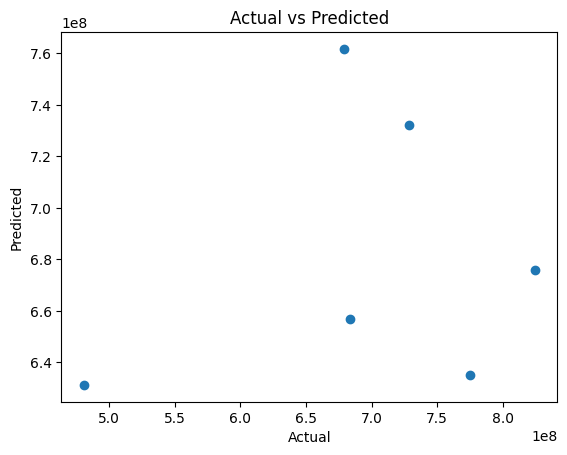

In [25]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()

In [27]:
# Apply log transformation to the numeric columns
data_log = data.copy()
data_log[['Salary Expense', 'Marketing Expense', 'Operational Expense', 'Revenue']] = np.log1p(data[['Salary Expense', 'Marketing Expense', 'Operational Expense', 'Revenue']])

# Define independent (features) and dependent (target) variables after log transformation
X_log = data_log[['Salary Expense', 'Marketing Expense', 'Operational Expense']]  # Independent variables
y_log = data_log['Revenue']  # Dependent variable

# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_log, y_log, test_size=0.2, random_state=42)

# Train Linear Regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred_log = model.predict(X_test)


# Coefficients and intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [ 0.51361265 -0.0149004   0.1317061 ]
Intercept: 9.281206734899541


In [32]:
import statsmodels.api as sm

# Add a constant to the independent variables matrix for the intercept term
X_log_with_const = sm.add_constant(X_log)

# Fit the model using statsmodels
model_stats = sm.OLS(y_log, X_log_with_const).fit(cov_type='HC3')

# Get the summary of the model which includes p-values and t-statistics
model_stats_summary = model_stats.summary()

model_stats_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Revenue   R-squared:                       0.554
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     6.818
Date:                Mon, 02 Dec 2024   Prob (F-statistic):            0.00153
Time:                        22:46:15   Log-Likelihood:                 13.535
No. Observations:                  30   AIC:                            -19.07
Df Residuals:                      26   BIC:                            -13.46
Df Model:                           3                                         
Covariance Type:                  HC3                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   9.3345      2.758      3.384      0.001       3.929      14.740
Salary Expense          0.5813      0.315      1.847      0.065      -0.036       1.198
Marketing Expense      -0.0462      0.115     -0.401      0.689      -0.272       0.180
Operational Expense     0.0880      0.258      0.341      0.733      -0.418       0.594
==============================================================================
Omnibus:                        2.272   Durbin-Watson:                   1.585
Prob(Omnibus):                  0.321   Jarque-Bera (JB):                1.955
Skew:                          -0.601   Prob(JB):                        0.376
Kurtosis:                       2.657   Cond. No.                     2.36e+03
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC3)
[2] The condition number is large, 2.36e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
# Evaluate model performance
from sklearn.metrics import mean_squared_error, r2_score
mse_log = mean_squared_error(y_test, y_pred_log)
r2_log = r2_score(y_test, y_pred_log)

mse_log, r2_log

(0.028251032392827655, 0.051070211481802796)